In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr
from scipy.stats import ttest_ind

### Summary:
This section  goes through some basic statistics, with a focus on the title_length feature. the text_length feature has overlappig distributions, for the two datasets, and is not as useful in distinguishing fake and real news.<br>

**Hypothesis Test**:<br>
> H0: There is no difference in the title_length between fake and real news.<br>
> H1: Title_lengths are different in fake and real news.<br>

+ There is a negative correlation between label and title_length. This is the highest correlation, among all features in the correlation matrix.
+ The whole dataset has a title_length with a mean of 76.71, and standard deviation of 22.18. Fake data has a mean of 91.19 and Real data a mean of 64.67.
+ The datasets are not perfectly normal, but are assumed to be.
+ The fake and real datasets are idependent (pearson correlation coefficient of 0.0063).
+ T-test yields a 0 p-value, therefore the null hypothesis is rejected. It is possible to use the title_length to predict fake and real data. This can be tried independentily or as part of an engineered feature.




### Load Data:

In [2]:
All2 = pd.read_csv('allnews_extra_title_clean.csv')
All2.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
All2.head()

,title,text,subject,date,day_of_week,month,year,title_length,text_length,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,2017-12-31,Sunday,12,2017,79,2893,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,2017-12-31,Sunday,12,2017,69,1898,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,2017-12-30,Saturday,12,2017,90,3597,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,2017-12-29,Friday,12,2017,78,2774,0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,2017-12-25,Monday,12,2017,70,2346,0


### Basic Stats and Distributions
#### Whole Data:

In [14]:
All2.describe() # basic stats

,month,year,title_length,text_length,label
count,38137.000000,38137.000000,38137.000000,38137.000000,38137.000000
mean,7.276556,2016.556258,76.717518,2459.019246,0.545927
std,3.520960,0.575794,22.186784,1928.132006,0.497893
min,1.000000,2015.000000,15.000000,46.000000,0.000000
25%,4.000000,2016.000000,62.000000,1335.000000,0.000000
50%,8.000000,2017.000000,71.000000,2231.000000,1.000000
75%,10.000000,2017.000000,87.000000,3092.000000,1.000000
max,12.000000,2018.000000,286.000000,51794.000000,1.000000


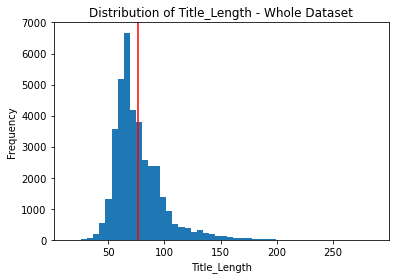

In [4]:
# Overall distribution of dataset:
_ = plt.hist(All2.title_length, bins=50)
_ = plt.xlabel('Title_Length')
_ = plt.ylabel('Frequency')
_ = plt.title('Distribution of Title_Length - Whole Dataset')
_ = plt.axvline(76.7, color='r')   # mean of data

#### Correlation Matrix

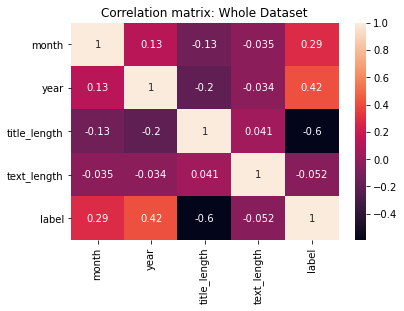

In [5]:
sns.heatmap(All2.corr(), annot=True)
plt.title("Correlation matrix: Whole Dataset")
plt.show();

#### Fake data:

In [65]:
All2_fake.describe()

,month,year,title_length,text_length,label
count,17317.000000,17317.000000,17317.000000,17317.000000,17317.0
mean,6.167292,2016.291217,91.198533,2568.260438,0.0
std,3.394028,0.626861,24.482290,2196.687580,0.0
min,1.000000,2015.000000,15.000000,46.000000,0.0
25%,3.000000,2016.000000,77.000000,1673.000000,0.0
50%,6.000000,2016.000000,88.000000,2242.000000,0.0
75%,9.000000,2017.000000,100.000000,3015.000000,0.0
max,12.000000,2018.000000,286.000000,51794.000000,0.0


In [7]:
All2_fake = All2[All2['label'] == 0]
All2_fake.groupby('label')['day_of_week'].value_counts()

label  day_of_week
0      Wednesday      2646
       Thursday       2625
       Friday         2568
       Tuesday        2562
       Monday         2441
       Sunday         2289
       Saturday       2186
Name: day_of_week, dtype: int64

In [8]:
All2_title_len_fake = All2_fake['title_length']
All2_title_len_fake.shape

(17317,)

#### Real data

In [9]:
All2_real = All2[All2['label'] == 1]
All2_real.groupby('label')['day_of_week'].value_counts()

label  day_of_week
1      Wednesday      4039
       Thursday       3963
       Tuesday        3675
       Friday         3588
       Monday         2998
       Sunday         1384
       Saturday       1173
Name: day_of_week, dtype: int64

In [10]:
All2_real.describe()

,month,year,title_length,text_length,label
count,20820.000000,20820.000000,20820.000000,20820.000000,20820.0
mean,8.199183,2016.776705,64.672959,2368.158069,1.0
std,3.354555,0.416464,9.147090,1666.833682,0.0
min,1.000000,2016.000000,26.000000,152.000000,1.0
25%,6.000000,2017.000000,59.000000,914.000000,1.0
50%,9.000000,2017.000000,64.000000,2214.000000,1.0
75%,11.000000,2017.000000,70.000000,3204.250000,1.0
max,12.000000,2017.000000,133.000000,29781.000000,1.0


In [11]:
# Real data has more rows!
All2_title_len_real = All2_real['title_length']
All2_title_len_real.shape

(20820,)

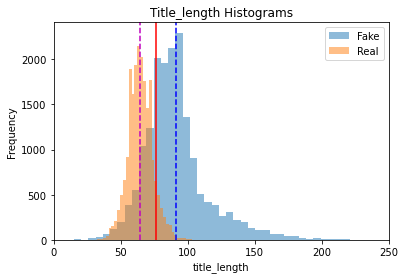

In [12]:
# Plot title_length counts

plt.hist(All2_title_len_fake, bins=50, alpha=0.5, label='Fake')
plt.hist(All2_title_len_real, bins=50, alpha=0.5, label='Real')
plt.title('Title_length Histograms')
plt.xlim(0, 250)
plt.xlabel('title_length')
plt.ylabel('Frequency')
plt.axvline(76.7, color='r')                    # mean of whole dataset
plt.axvline(91.19, color='b', linestyle='--')   # mean of fake data
plt.axvline(64.67, color='m', linestyle='--')   # mean of real data
plt.legend();

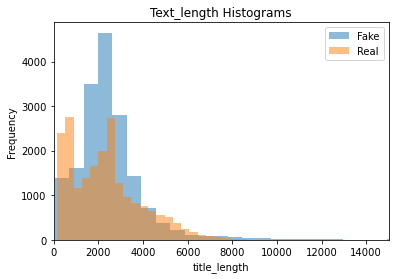

In [13]:
# Plot text_length counts
f_text_len = All2[All2['label']==0]
r_text_len = All2[All2['label']==1]

plt.hist(f_text_len.text_length, bins=80, alpha=0.5, label='Fake')
plt.hist(r_text_len.text_length, bins=80, alpha=0.5, label='Real')
plt.title('Text_length Histograms')
plt.xlim(0, 15000)
plt.xlabel('title_length')
plt.ylabel('Frequency')
plt.legend();

Randomly sample the Real data to be of the same shape as the Fake data

In [56]:
# Random sampling of Real to 17,317 rows (same as Fake data, for use in pearsonr function):
All2_title_len_real_rand = All2_title_len_real.sample(n=17317, random_state=124)
All2_title_len_real_rand.shape

(17317,)

#### Independence Test:

In [34]:
# Are the two samples independent?
pears_coef, p = pearsonr(All2_title_len_fake, All2_title_len_real_rand)
print('pearsons_correlation_coeficient = ', round(pears_coef, 4))
print('p_vale = ',round(p, 4))
if p > 0.05:
    print('Independent samples')
else:
    print('Dependent samples')

pearsons_correlation_coeficient =  0.0063
p_vale =  0.4045
Independent samples


#### t-test:

In [55]:
#Test whether the means of the two independent samples are significantly different:

tstat, p = ttest_ind(All2_title_len_fake, All2_title_len_real_rand, equal_var=False)
print('t-statistic = ', round(tstat, 4))
print('p = ',round(p, 4))

if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

t-statistic =  133.5505
p =  0.0
Probably different distributions


Conclusion: the means of the Fake and Real news title_lengths are significantly different. This makes it possible to use this feature in distinguishing the two.